In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
%matplotlib inline

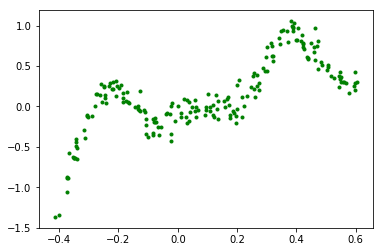

In [2]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [3]:
## defining the model
n_hidden = 20
optimizer = tnn.Adam(learning_rate=0.003)
layer1prob = tnn.NonLinearLayer(1, n_hidden, activation=tnn.Softmax(), optimizer=optimizer)
layer1reg = tnn.LinearLayer(1, n_hidden, optimizer=optimizer)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    probs = layer1prob.forward(xx)
    regs = layer1reg.forward(xx)
    a1 = probs*regs
    y_out = a1.sum(axis=1, keepdims=True)
#     print(y_out)
#     print(probs)
#     print(regs)
#     break

    loss = tnn.MseLoss.loss(y_out, yy)
    dy = tnn.MseLoss.del_loss(y_out, yy)
    
    da1 = np.hstack([dy]*n_hidden)
#     print(da1.shape)
    dxp = layer1prob.backward(da1)
    dxr = layer1reg.backward(da1)
    dx = dxp + dxr
    
    layer1prob.update()
    layer1reg.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.0894666313785351

_______________________
epoch 100
Loss 0.06337172371292966

_______________________
epoch 200
Loss 0.05311498886645971

_______________________
epoch 300
Loss 0.04879877742139529

_______________________
epoch 400
Loss 0.04729669518692028

_______________________
epoch 500
Loss 0.04686510498768955

_______________________
epoch 600
Loss 0.04675967979507184

_______________________
epoch 700
Loss 0.04673274190436159

_______________________
epoch 800
Loss 0.04672012935908664

_______________________
epoch 900
Loss 0.04670923205537913

_______________________
epoch 1000
Loss 0.04669836519122779

_______________________
epoch 1100
Loss 0.04668747408417312

_______________________
epoch 1200
Loss 0.04667660551633592

_______________________
epoch 1300
Loss 0.046665769308990815

_______________________
epoch 1400
Loss 0.046654958345557086

_______________________
epoch 1500
Loss 0.04664416618798837

_______________________
epoch 1600


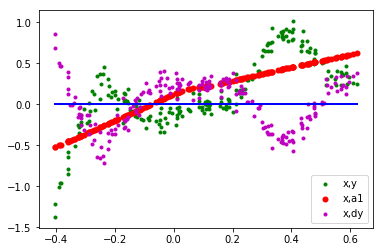

In [9]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.legend()

In [10]:
layer1prob.output

array([[6.21960479e-07, 1.18839445e-05, 4.94658408e-01, ...,
        5.05141058e-01, 1.12856996e-04, 3.95697497e-07],
       [9.61611539e-07, 1.63816215e-05, 4.95031330e-01, ...,
        5.04708279e-01, 1.41881253e-04, 6.39824523e-07],
       [6.22834179e-07, 1.18962394e-05, 4.94659621e-01, ...,
        5.05139676e-01, 1.12940241e-04, 3.96310559e-07],
       ...,
       [7.72428028e-10, 3.85446518e-11, 9.94884801e-14, ...,
        9.34599216e-14, 3.09359061e-12, 5.01244336e-09],
       [5.96706509e-10, 2.83922386e-11, 6.41713267e-14, ...,
        6.02425798e-14, 2.19336942e-12, 3.94477227e-09],
       [4.06810983e-10, 1.80367653e-11, 3.34745141e-14, ...,
        3.13939759e-14, 1.31660100e-12, 2.76458740e-09]])